In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

In [69]:
df = pd.read_excel("2020_2019_2018Г.xlsx") #импортируем данные с файла эксель

In [70]:
df

,№,Наименование,Регистрационный номер,Вид деятельности/отрасль,"2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB",...,"2020, Рентабельность затрат, %","2018, Рентабельность активов (ROA), %","2019, Рентабельность активов (ROA), %","2020, Рентабельность активов (ROA), %","2018, Рентабельность капитала (ROE), %","2019, Рентабельность капитала (ROE), %","2020, Рентабельность капитала (ROE), %","2018, Коэффициент текущей ликвидности, %","2019, Коэффициент текущей ликвидности, %","2020, Коэффициент текущей ликвидности, %"
0,1,"ЯНДЕКС, ООО",1027700229193,Разработка компьютерного программного обеспечения,1.048281e+11,1.237482e+11,132943553000,6.618119e+10,8.756748e+10,8.573663e+10,...,0.3908,0.2979,0.2523,0.2486,0.3431,0.2961,0.2893,4.5682,4.3244,5.4022
1,2,"ЯНДЕКС.ТАКСИ, ООО",5157746192731,Разработка компьютерного программного обеспечения,2.674484e+10,4.611519e+10,55843497000,1.710914e+10,2.898088e+10,4.032971e+10,...,0.1954,-0.2220,0.1808,-0.0341,-0.4272,0.3247,-0.0647,1.5262,2.0510,1.5500
2,3,"САП СНГ, ООО",1027739164640,Деятельность консультативная и работы в област...,3.518872e+10,3.557562e+10,35756221000,2.381901e+10,2.371069e+10,2.310492e+10,...,0.0915,0.0237,-0.0568,0.0517,0.1174,-0.3996,0.3985,0.9745,0.9488,1.0765
3,4,"ЛАБОРАТОРИЯ КАСПЕРСКОГО, АО",1027739867473,Разработка компьютерного программного обеспечения,2.353611e+10,3.410676e+10,32499855000,1.035916e+10,1.162382e+10,1.102450e+10,...,0.4071,0.1481,0.4220,0.2854,0.2609,0.6496,0.3736,4.1884,3.0321,2.7907
4,5,"В КОНТАКТЕ, ООО",1079847035179,Разработка компьютерного программного обеспече...,1.930914e+10,2.262923e+10,26496440000,8.459038e+09,9.616941e+09,1.161035e+10,...,0.5421,0.3746,0.4149,0.5403,0.4357,0.4980,0.7204,6.2616,4.0169,2.5603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"СЕВЕНТЕХ, ООО",1096316004674,Разработка компьютерного программного обеспечения,2.515960e+08,2.293467e+09,3391115000,2.511120e+08,6.362000e+06,3.264896e+09,...,0.0269,0.0041,0.1046,0.1417,-2.8848,1.9934,1.0582,0.9989,1.0691,1.2259
96,97,"БАРС ГРУП, АО",1121690063923,Разработка компьютерного программного обеспечения,1.992413e+09,2.530620e+09,3312159000,1.738768e+09,2.014711e+09,2.918895e+09,...,0.1331,0.1102,0.1237,0.1151,0.3777,0.3620,0.3957,1.4537,1.4398,1.2408
97,98,"ИНФОРМАЦИОННЫЕ СИСТЕМЫ, ООО",1197746254606,Разработка компьютерного программного обеспечения,NaN,1.498591e+09,3280813000,NaN,8.742640e+08,1.978020e+09,...,0.6473,NaN,0.6775,0.4991,NaN,2.0000,1.3545,NaN,1.5096,1.6223
98,99,"СВЭКО, ФГУП",1037700230534,Деятельность консультативная и работы в област...,5.907005e+09,6.020125e+09,3248324000,5.643884e+09,5.755639e+09,3.039362e+09,...,0.0009,0.0168,0.0143,0.0045,0.5794,0.6216,0.1759,1.0129,1.0220,1.0136


In [71]:
df.isna().sum() #Рассчитаем кол-во пустых значений в нашей датафрейме

№                                                                          0
Наименование                                                               0
Регистрационный номер                                                      0
Вид деятельности/отрасль                                                   0
2018, Выручка, RUB                                                         9
2019, Выручка, RUB                                                         3
2020, Выручка, RUB                                                         0
2018, Себестоимость продаж, RUB                                           10
2019, Себестоимость продаж, RUB                                            4
2020, Себестоимость продаж, RUB                                            2
2018, Коэффициент концентрации собственного капитала (автономии), %        7
2019, Коэффициент концентрации собственного капитала (автономии), %        3
2020, Коэффициент концентрации собственного капитала (автономии), %        1

In [72]:
df = df.dropna() #Удалим пустые значения
df.isna().sum()

№                                                                         0
Наименование                                                              0
Регистрационный номер                                                     0
Вид деятельности/отрасль                                                  0
2018, Выручка, RUB                                                        0
2019, Выручка, RUB                                                        0
2020, Выручка, RUB                                                        0
2018, Себестоимость продаж, RUB                                           0
2019, Себестоимость продаж, RUB                                           0
2020, Себестоимость продаж, RUB                                           0
2018, Коэффициент концентрации собственного капитала (автономии), %       0
2019, Коэффициент концентрации собственного капитала (автономии), %       0
2020, Коэффициент концентрации собственного капитала (автономии), %       0
2018, Коэффи

In [73]:
df_2018 = df.iloc[:, 4::3] #Разделим наши данные на 3 таблицы по годам
df_2019 = df.iloc[:, 5::3]
df_2020 = df.iloc[:, 6::3]

In [74]:
df_2018.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9'] #Для удобства переименуем столбцы
df_2019.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9']
df_2020.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9']

<AxesSubplot:>

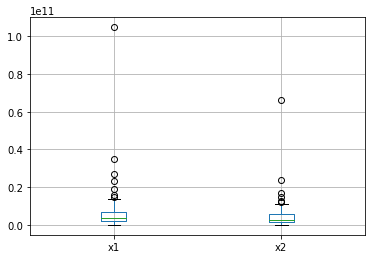

In [78]:
df_2018.boxplot(column=['x1', 'x2']) #Оцениваем выбросы(в остальных колонках их нет)

<AxesSubplot:>

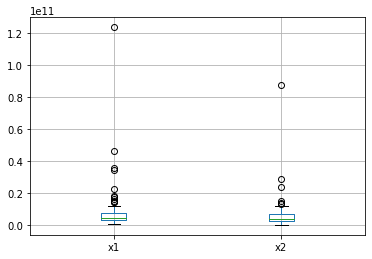

In [79]:
df_2019.boxplot(column=['x1', 'x2'])

<AxesSubplot:>

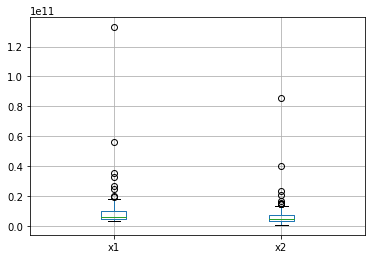

In [80]:
df_2020.boxplot(column=['x1', 'x2'])

In [81]:
def find_anomalies(dataframe): #Применим метод 3IQR для очистки данных
    dataframe_std = np.std(dataframe)
    dataframe_mean = np.mean(dataframe)
    anomaly_cut_off = dataframe_std * 3
    
    lower_limit  = dataframe_mean - anomaly_cut_off 
    upper_limit = dataframe_mean + anomaly_cut_off
    return df[~((df<(lower_limit)) | (df>(upper_limit)))] 


find_anomalies(df)

,№,Наименование,Регистрационный номер,Вид деятельности/отрасль,"2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB",...,"2020, Рентабельность затрат, %","2018, Рентабельность активов (ROA), %","2019, Рентабельность активов (ROA), %","2020, Рентабельность активов (ROA), %","2018, Рентабельность капитала (ROE), %","2019, Рентабельность капитала (ROE), %","2020, Рентабельность капитала (ROE), %","2018, Коэффициент текущей ликвидности, %","2019, Коэффициент текущей ликвидности, %","2020, Коэффициент текущей ликвидности, %"
0,1,"ЯНДЕКС, ООО",1.027700e+12,Разработка компьютерного программного обеспечения,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3908,0.2979,0.2523,0.2486,0.3431,0.2961,0.2893,4.5682,4.3244,5.4022
1,2,"ЯНДЕКС.ТАКСИ, ООО",NaN,Разработка компьютерного программного обеспечения,2.674484e+10,4.611519e+10,5.584350e+10,1.710914e+10,2.898088e+10,NaN,...,0.1954,-0.2220,0.1808,-0.0341,-0.4272,0.3247,-0.0647,1.5262,2.0510,1.5500
2,3,"САП СНГ, ООО",1.027739e+12,Деятельность консультативная и работы в област...,3.518872e+10,3.557562e+10,3.575622e+10,2.381901e+10,2.371069e+10,2.310492e+10,...,0.0915,0.0237,-0.0568,0.0517,0.1174,-0.3996,0.3985,0.9745,0.9488,1.0765
3,4,"ЛАБОРАТОРИЯ КАСПЕРСКОГО, АО",1.027740e+12,Разработка компьютерного программного обеспечения,2.353611e+10,3.410676e+10,3.249986e+10,1.035916e+10,1.162382e+10,1.102450e+10,...,0.4071,0.1481,0.4220,0.2854,0.2609,0.6496,0.3736,4.1884,3.0321,2.7907
4,5,"В КОНТАКТЕ, ООО",1.079847e+12,Разработка компьютерного программного обеспече...,1.930914e+10,2.262923e+10,2.649644e+10,8.459038e+09,9.616941e+09,1.161035e+10,...,0.5421,0.3746,0.4149,0.5403,0.4357,0.4980,0.7204,6.2616,4.0169,2.5603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,"ЯНДЕКС.МАРКЕТ ЛАБ, ООО",1.167746e+12,Разработка компьютерного программного обеспечения,5.281010e+08,3.099272e+09,3.414644e+09,1.741024e+09,2.321649e+09,2.696947e+09,...,0.0942,0.3481,0.0342,0.2731,0.8181,0.1624,0.9258,1.0605,0.9117,1.1278
95,96,"СЕВЕНТЕХ, ООО",1.096316e+12,Разработка компьютерного программного обеспечения,2.515960e+08,2.293467e+09,3.391115e+09,2.511120e+08,6.362000e+06,3.264896e+09,...,0.0269,0.0041,0.1046,0.1417,-2.8848,1.9934,1.0582,0.9989,1.0691,1.2259
96,97,"БАРС ГРУП, АО",1.121690e+12,Разработка компьютерного программного обеспечения,1.992413e+09,2.530620e+09,3.312159e+09,1.738768e+09,2.014711e+09,2.918895e+09,...,0.1331,0.1102,0.1237,0.1151,0.3777,0.3620,0.3957,1.4537,1.4398,1.2408
98,99,"СВЭКО, ФГУП",1.037700e+12,Деятельность консультативная и работы в област...,5.907005e+09,6.020125e+09,3.248324e+09,5.643884e+09,5.755639e+09,3.039362e+09,...,0.0009,0.0168,0.0143,0.0045,0.5794,0.6216,0.1759,1.0129,1.0220,1.0136


In [82]:
df = find_anomalies(df).dropna()
df.isna().sum()

№                                                                         0
Наименование                                                              0
Регистрационный номер                                                     0
Вид деятельности/отрасль                                                  0
2018, Выручка, RUB                                                        0
2019, Выручка, RUB                                                        0
2020, Выручка, RUB                                                        0
2018, Себестоимость продаж, RUB                                           0
2019, Себестоимость продаж, RUB                                           0
2020, Себестоимость продаж, RUB                                           0
2018, Коэффициент концентрации собственного капитала (автономии), %       0
2019, Коэффициент концентрации собственного капитала (автономии), %       0
2020, Коэффициент концентрации собственного капитала (автономии), %       0
2018, Коэффи

In [83]:
df_2018 = df.iloc[:, 4::3]
df_2019 = df.iloc[:, 5::3]
df_2020 = df.iloc[:, 6::3]
df_2018.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9']
df_2019.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9']
df_2020.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x8', 'x9']

<AxesSubplot:>

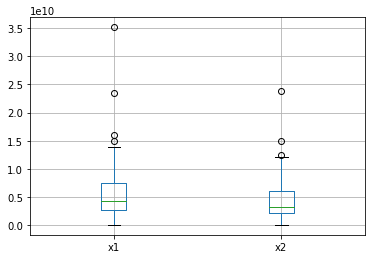

In [89]:
df_2018.boxplot(column=['x1', 'x2']) #Проверим изменения с помощью ящичковых диаграмм

<AxesSubplot:>

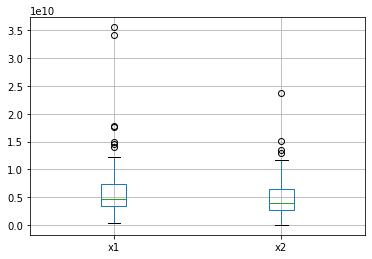

In [90]:
df_2019.boxplot(column=['x1', 'x2'])

<AxesSubplot:>

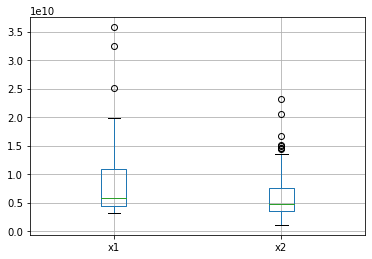

In [91]:
df_2020.boxplot(column=['x1', 'x2'])

## Заранее выберем целевые (y) данные и факторные (x) для нашей модели


### y - 2019, Рентабельность активов (ROA), %


### x1 - 2019, Выручка, RUB

### x2 - 2019, Себестоимость продаж, RUB

### x3 - 2019, Коэффициент концентрации собственного капитала (автономии), %

### x4 - 2019, Коэффициент маневренности собственных средств, %

### x5 - 2019, Коэффициент обеспеченности собственными оборотными средствами, %

### x6 - 2019, Чистая норма прибыли, %

### x7 - 2019, Рентабельность затрат, %

### x8 - 2019, Рентабельность капитала (ROE), %

### x9 - 2019, Коэффициент текущей ликвидности, %

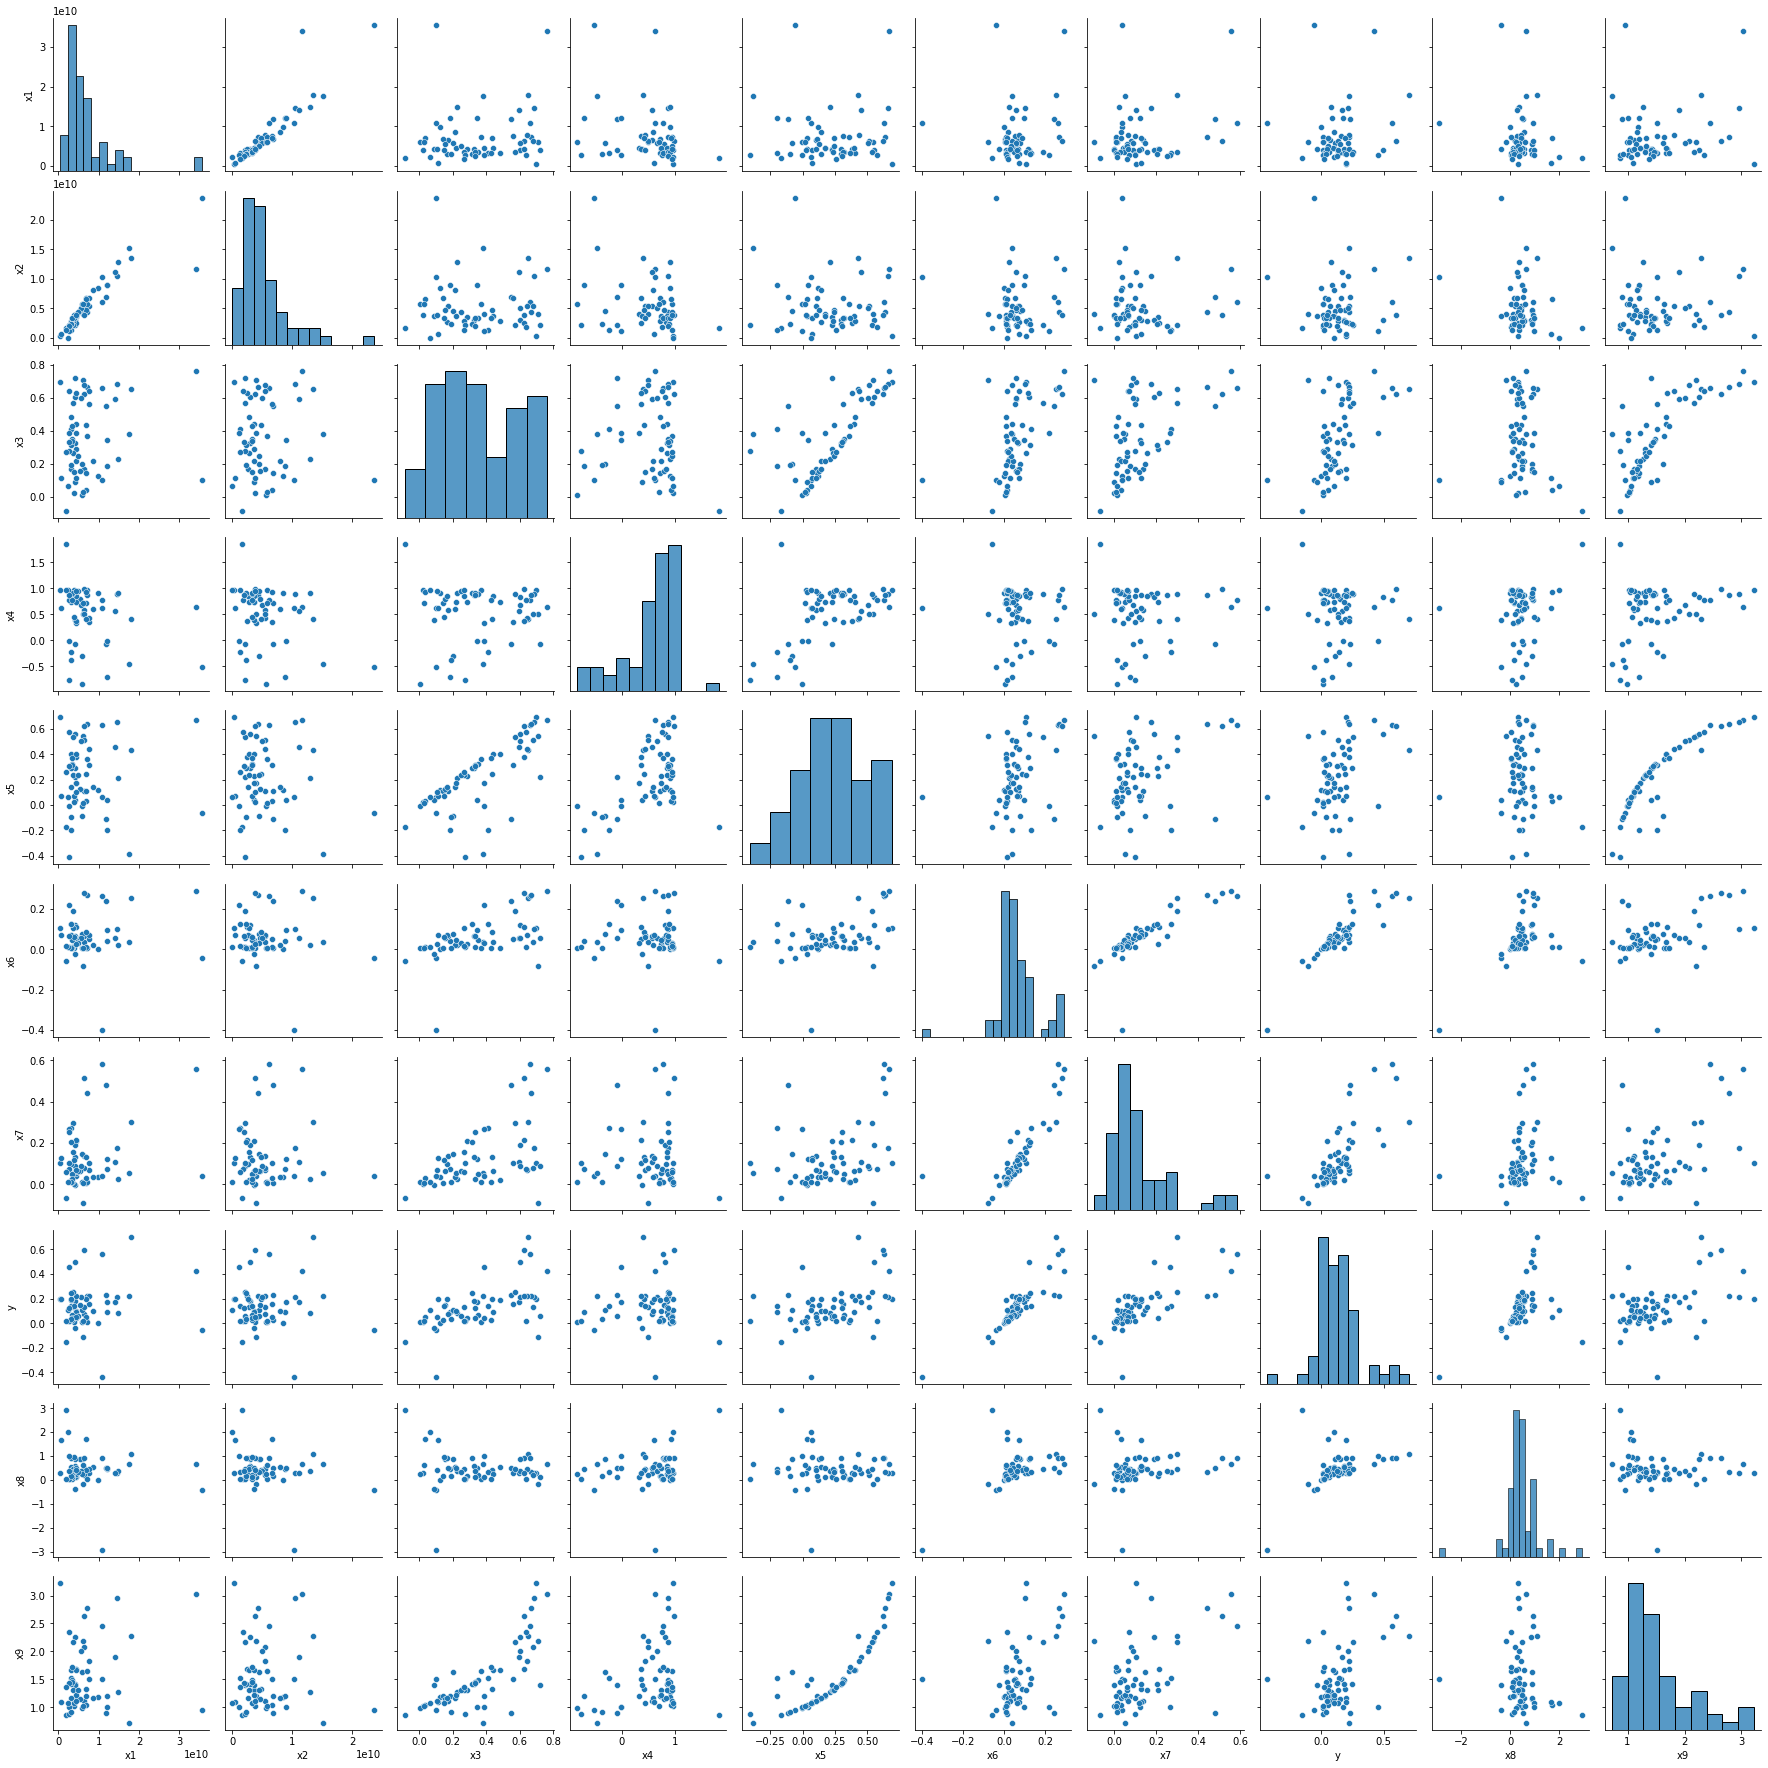

In [92]:
sns.pairplot(df_2019) #Рассмотрим связи между нашими переменными и посмотрим на их распределения, все они похожи на нормальные

In [93]:
corr = df_2019.corr() #Построим корреляционную матрицу для наших данных  
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,x6,x7,y,x8,x9
x1,1.000000,0.909843,0.157008,-0.276993,0.028707,0.140330,0.268562,0.163138,-0.159187,0.158157
x2,0.909843,1.000000,0.001976,-0.297920,-0.099793,-0.076013,0.029688,0.015584,-0.253564,-0.012883
x3,0.157008,0.001976,1.000000,0.008628,0.728885,0.523716,0.519220,0.551055,-0.117149,0.782773
x4,-0.276993,-0.297920,0.008628,1.000000,0.525118,-0.007742,-0.016053,0.007979,0.240021,0.297176
x5,0.028707,-0.099793,0.728885,0.525118,1.000000,0.355398,0.353252,0.413434,-0.080028,0.866958
x6,0.140330,-0.076013,0.523716,-0.007742,0.355398,1.000000,0.805808,0.880031,0.482823,0.420106
x7,0.268562,0.029688,0.519220,-0.016053,0.353252,0.805808,1.000000,0.723309,0.141411,0.486190
y,0.163138,0.015584,0.551055,0.007979,0.413434,0.880031,0.723309,1.000000,0.446557,0.451720
x8,-0.159187,-0.253564,-0.117149,0.240021,-0.080028,0.482823,0.141411,0.446557,1.000000,-0.103217
x9,0.158157,-0.012883,0.782773,0.297176,0.866958,0.420106,0.486190,0.451720,-0.103217,1.000000


In [94]:
target = df_2019["y"] #Применим шаговую регрессию для включения наших факторов в модель
features = df_2019["x6"]

In [95]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              296.7
Date:                Thu, 27 May 2021   Prob (F-statistic):                    4.13e-25
Time:                        17:45:27   Log-Likelihood:                          60.660
No. Observations:                  62   AIC:                                     -119.3
Df Residuals:                      61   BIC:                                     -117.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [96]:
features = df_2019[["x6","x7"]]

In [97]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              156.8
Date:                Thu, 27 May 2021   Prob (F-statistic):                    1.48e-24
Time:                        17:45:34   Log-Likelihood:                          62.520
No. Observations:                  62   AIC:                                     -121.0
Df Residuals:                      60   BIC:                                     -116.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [137]:
features = df_2019[["x6","x7","x3"]]

In [138]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              124.3
Date:                Thu, 27 May 2021   Prob (F-statistic):                    1.82e-25
Time:                        18:12:19   Log-Likelihood:                          67.532
No. Observations:                  62   AIC:                                     -129.1
Df Residuals:                      59   BIC:                                     -122.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
features = df_2019[["x6","x7","x3","x9"]]

In [140]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              92.68
Date:                Thu, 27 May 2021   Prob (F-statistic):                    1.67e-24
Time:                        18:12:22   Log-Likelihood:                          67.836
No. Observations:                  62   AIC:                                     -127.7
Df Residuals:                      58   BIC:                                     -119.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [141]:
features = df_2019[["x6","x7","x3","x9","x8"]]

In [142]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              76.61
Date:                Thu, 27 May 2021   Prob (F-statistic):                    5.04e-24
Time:                        18:12:23   Log-Likelihood:                          69.182
No. Observations:                  62   AIC:                                     -128.4
Df Residuals:                      57   BIC:                                     -117.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
features = df_2019[["x6","x7","x3","x9","x8","x5"]]

In [144]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              63.99
Date:                Thu, 27 May 2021   Prob (F-statistic):                    2.88e-23
Time:                        18:12:24   Log-Likelihood:                          69.724
No. Observations:                  62   AIC:                                     -127.4
Df Residuals:                      56   BIC:                                     -114.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [145]:
features = df_2019[["x6","x7","x3","x9","x8","x5","x1"]]

In [146]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              54.85
Date:                Thu, 27 May 2021   Prob (F-statistic):                    1.57e-22
Time:                        18:12:25   Log-Likelihood:                          70.212
No. Observations:                  62   AIC:                                     -126.4
Df Residuals:                      55   BIC:                                     -111.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [147]:
features = df_2019[["x6","x7","x3","x9","x8","x5","x1","x2"]]

In [148]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              54.52
Date:                Thu, 27 May 2021   Prob (F-statistic):                    3.95e-23
Time:                        18:12:26   Log-Likelihood:                          74.204
No. Observations:                  62   AIC:                                     -132.4
Df Residuals:                      54   BIC:                                     -115.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [149]:
features = df_2019[["x6","x7","x3","x9","x8","x5","x1","x2","x4"]]

In [150]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              52.87
Date:                Thu, 27 May 2021   Prob (F-statistic):                    2.57e-23
Time:                        18:12:27   Log-Likelihood:                          77.137
No. Observations:                  62   AIC:                                     -136.3
Df Residuals:                      53   BIC:                                     -117.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [151]:
features = df_2019[["x7","x9","x8","x5","x1","x2","x4"]]#Из-за мультиколлинеарности x6 уберем фактор из модели
#также заметим что фактор x3 не влияет на нашу модель

In [162]:
model = sm.OLS(target, features).fit() 
predictions = model.predict(features)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              55.61
Date:                Thu, 27 May 2021   Prob (F-statistic):                    1.13e-22
Time:                        18:13:31   Log-Likelihood:                          70.586
No. Observations:                  62   AIC:                                     -127.2
Df Residuals:                      55   BIC:                                     -112.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

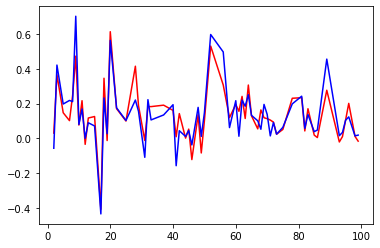

In [163]:
plt.plot(predictions, color='red') #График фактических значений и предсказанных
plt.plot(target, color='blue')
plt.show()

In [164]:
df = pd.DataFrame({'Actual': target, 'Predicted': predictions})
df1 = df.head(25)

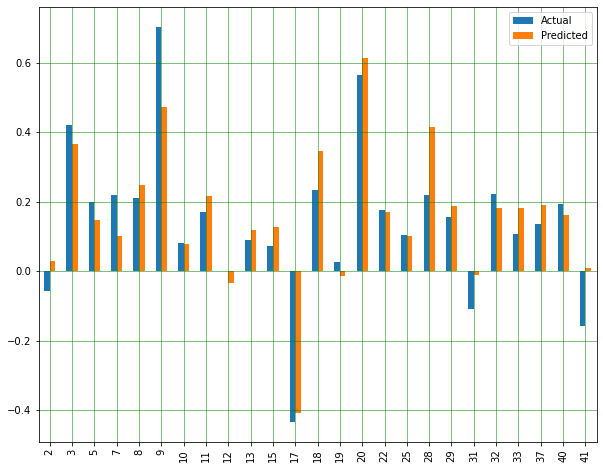

In [165]:
df1.plot(kind='bar',figsize=(10,8)) #Предсказанные и фактические значения рентабельности активов
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [166]:
print('Mean Absolute Error:', metrics.mean_absolute_error(target, predictions)) #Данные значения говорят нам о сравнительной точности нашей модели 
print('Mean Squared Error:', metrics.mean_squared_error(target, predictions))  

Mean Absolute Error: 0.05746018936861912
Mean Squared Error: 0.006006978129305566
